In [33]:
#defaults python
import os
import glob
import math
import ast
import statistics
import requests
import json
import io
import datetime
from time import time
from dateutil import parser
from multiprocessing.dummy import Pool
import urllib3
from requests.adapters import HTTPAdapter
from datetime import datetime, timedelta
from collections import Counter
from itertools import chain
import itertools

# datascience imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite


from scipy.sparse import linalg

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, \
                MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS

from sklearn.decomposition import PCA

from sklearn.random_projection import GaussianRandomProjection

from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score,  \
                        calinski_harabasz_score, homogeneity_score, classification_report, roc_auc_score, plot_roc_curve, roc_curve

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.ensemble import RandomForestClassifier,StackingClassifier,AdaBoostClassifier, ExtraTreesClassifier

from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from tqdm.autonotebook import tqdm

#graphical imports
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors 
%matplotlib inline

import plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import io as plotlyio

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import offsetbox
from matplotlib.ticker import NullFormatter

from mpl_toolkits.mplot3d import Axes3D 

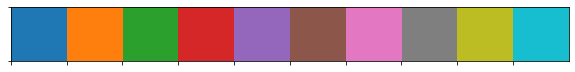

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set()

In [3]:
ratiodf = pd.read_csv("../generateddata/ratiooccuranceclusters.csv")
binarydf = pd.read_csv("../generateddata/binaryoccuranceclusters.csv")

In [58]:
ratiodf.head()

,Unnamed: 0,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,...,Mapping4,ComplexityReuse2,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6,cluster
0,0,BYD0550b_UBLSimplerInvoicing_ByD_to_BDS,0.052632,0.052632,0.210526,0.052632,0.263158,0.052632,0.105263,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,1,OMS8100_AssortmentInformation_OMS_to_MijnPK,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,2,SF0500_JustificationReports_to_BW,0.000000,0.125000,0.000000,0.125000,0.250000,0.000000,0.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,3,HR0010_Emolumenten_OWS_to_Payroll,0.000000,0.000000,0.000000,0.000000,0.550000,0.000000,0.100000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,OMS7250_StockInformation_PostNLShop_to_OMS,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [59]:
ratioclusterhist = px.histogram(ratiodf, x="cluster", title="Ratio",template="simple_white")
ratioclusterhist.show(renderer="chrome")

In [60]:
binarydf.head()

,Unnamed: 0,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,...,Mapping4,ComplexityReuse2,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6,cluster
0,0,BYD0550b_UBLSimplerInvoicing_ByD_to_BDS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,1,OMS8100_AssortmentInformation_OMS_to_MijnPK,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2,SF0500_JustificationReports_to_BW,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,HR0010_Emolumenten_OWS_to_Payroll,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,OMS7250_StockInformation_PostNLShop_to_OMS,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [61]:
binaryclusterhist = px.histogram(binarydf, x="cluster", title="Binary",template="simple_white")
binaryclusterhist.show(renderer="chrome")

In [4]:
def createXy(df_data):
    X = df_data.drop(["Unnamed: 0", 'cluster', 'scenario'], axis=1).values
    y = df_data['cluster'].values
    return X,y

In [5]:
def create_scaled_train_test(X,y, size=0.3, strat=None):
    if strat == None:
        strat = y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, stratify=strat, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

## Classifiers

In [51]:
classifiers = [
    ('RandomForestClassifierGini', RandomForestClassifier(n_jobs=-1, criterion='gini', random_state=42)),
    ('RandomForestClassifierEntropy', RandomForestClassifier(n_jobs=-1, criterion='entropy', random_state=42)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1, random_state=42)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
#     ('ExtraTreeClassifier', ExtraTreeClassifier()),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=42)),
    ('BernoulliNB', BernoulliNB()), 
#     ('stack1', clf),
#     ('stack2', clf2),
#     ('stack3', clf3),
#     ('stack4', clf4),
#     ('stack5', clf5),
#     ("KNN",KNeighborsClassifier(3)),
#     ("SVCLin",SVC(kernel="linear", C=0.025)),
#     ("SCV",SVC(gamma=2, C=1)),
#     ("Gaus",GaussianProcessClassifier(1.0 * RBF(1.0))),
#     ("DecisionTree",DecisionTreeClassifier(max_depth=5,random_state=42)),
#     ("RF",RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
#     ("MLP",MLPClassifier(alpha=1, max_iter=1000)),
#     ("Ada",AdaBoostClassifier()),
#     ("GausNB",GaussianNB()),
#     ("Quad",QuadraticDiscriminantAnalysis())
]

def testClassifiers(X,y):
    allscores = []
    cv = 3

    t0 = time()
    for name, classifier in classifiers:
        scores = []
        roc = cross_val_score(classifier, X, y, cv=cv, n_jobs=-1) # Evaluates a score by cross-validation
        # by default with argument cv=None, the c_v_s uses the default 3-fold cross validation, 
        
        scores.extend(list(roc))
        scores = np.array(scores) # all the scores per run 
        print(name, "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #print(name, scores.mean())
        new_data = [(name, score) for score in scores]
        allscores.extend(new_data)
    print("done in %0.3fs" % (time() - t0))
    return allscores

In [79]:
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [85]:
def testClassifiersReport(X,y):
    X_train, X_test, y_train, y_test = create_scaled_train_test(X,y)
    results = {}
    for name, classifier in classifiers:
        y_score = classifier.fit(X_train, y_train).predict(X_test)
        predictions_proba = classifier.predict_proba(X_test)
#         print(y_score)
#         print(y_test)
#         print(predictions_proba)
        report_with_auc = class_report(
            y_true=y_test, 
            y_pred=classifier.predict(X_test), 
            y_score=classifier.predict_proba(X_test))
        print(name)
        print(report_with_auc.to_latex())
#         ras = roc_auc_score(y_test, predictions_proba[:,1], multi_class="ovo")
#         print(ras)
#         n_classes = len(np.unique(y))
        
#         # Compute ROC curve and ROC area for each class
#         fpr = dict()
#         tpr = dict()
#         roc_auc = dict()
#         for i in range(n_classes):
#             fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])

#         # Plot of a ROC curve for a specific class
#         for i in range(n_classes):
#             plt.figure()
#             plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#             plt.plot([0, 1], [0, 1], 'k--')
#             plt.xlim([0.0, 1.0])
#             plt.ylim([0.0, 1.05])
#             plt.xlabel('False Positive Rate')
#             plt.ylabel('True Positive Rate')
#             plt.title('Receiver operating characteristic example')
#             plt.legend(loc="lower right")
#             plt.show()
                
        results.update({name:classification_report(y_test, y_score, output_dict=True,zero_division=0)})
    return results

In [54]:
def drawPlot(allscores,title):
    temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
    fig = px.box(temp, x="classifier", y="score", points="all", title=title,template="simple_white")
    return fig

In [55]:
def drawCombinedPlot(allscores1, allscores2,name1,name2, title):
    temp = pd.DataFrame(allscores1, columns=['classifier', 'score'])
    temp['sort'] = name1
    temp2 = pd.DataFrame(allscores2, columns=['classifier', 'score'])
    temp2['sort'] = name2
    res = pd.concat([temp,temp2])
    fig = px.box(res, x="classifier", y="score", points="all", title=title,template="simple_white", color="sort")
    return fig

In [56]:
def run(dataset,title):
    X,y = createXy(dataset)
    allscores = testClassifiers(X,y)
    fig = drawPlot(allscores,title)
    return fig, allscores

## Run

In [62]:
roc_plots = []
fig, data1 = run(binarydf, title="Binary")
fig.show(renderer="chrome")

RandomForestClassifierGini Accuracy: 0.91 (+/- 0.04)
RandomForestClassifierEntropy Accuracy: 0.91 (+/- 0.04)
ExtraTreesClassifier Accuracy: 0.90 (+/- 0.03)
DecisionTreeClassifier Accuracy: 0.84 (+/- 0.02)
LogisticRegression Accuracy: 0.95 (+/- 0.05)
BernoulliNB Accuracy: 0.92 (+/- 0.05)
done in 10.781s


In [58]:
fig2, data2 = run(ratiodf, title="Ratio")
fig2.show(renderer="chrome")

RandomForestClassifierGini Accuracy: 0.90 (+/- 0.05)
RandomForestClassifierEntropy Accuracy: 0.87 (+/- 0.08)
ExtraTreesClassifier Accuracy: 0.86 (+/- 0.05)
DecisionTreeClassifier Accuracy: 0.86 (+/- 0.04)
LogisticRegression Accuracy: 0.70 (+/- 0.05)
BernoulliNB Accuracy: 0.56 (+/- 0.07)
done in 9.948s


In [233]:
fig.show(renderer="chrome")

In [242]:
fig3 = drawCombinedPlot(data1,data2,"Binary","Ratio","Classification results")
fig3.show(renderer="chrome")

In [123]:
fig = drawPlot(data1,"Binary")

In [113]:
file = open("../generateddata/BinaryClassiffier.html","w") 

file.write(plotlyio.to_html(fig))
 
file.close() 

In [114]:
file = open("../generateddata/RatioClassiffier.html","w") 
 
file.write(plotlyio.to_html(fig2))
 
file.close() 

In [ ]:
fig2.show(renderer="chrome")

In [121]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# predict

In [196]:
ratiodf = pd.read_csv("../generateddata/ratiooccuranceclusters.csv")
binarydf = pd.read_csv("../generateddata/binaryoccuranceclusters.csv")

In [197]:
bin_labels_5 = [1,2,3,4,5]

In [198]:
from joblib import dump, load

In [199]:
binclf = RandomForestClassifier(n_jobs=-1, criterion='gini', random_state=42)
X,y = createXy(binarydf)
X_train, X_test, y_train, y_test = create_scaled_train_test(X,y)
binclf.fit(X_train, y_train)
dump(binclf, 'binarymodel.joblib') 
y_pred = binclf.predict(X_test)

In [200]:
ratclf = LogisticRegression(n_jobs=-1, random_state=42)
X,y = createXy(ratiodf)
X_train, X_test, y_train, y_test = create_scaled_train_test(X,y)
ratclf.fit(X_train, y_train)
dump(ratclf, 'ratiomodel.joblib') 
y_pred = ratclf.predict(X_test)

In [201]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [209]:
binarymodel = load('binarymodel.joblib') 
binarydf['prediction'] = binarymodel.predict(X)

In [210]:
ratiomodel = load('ratiomodel.joblib') 
ratiodf['prediction'] = ratiomodel.predict(X)

In [242]:
binarydf['bin'] = pd.cut(binarydf['prediction'], bins=5, labels=bin_labels_5)
ratiodf['bin'] = pd.cut(ratiodf['prediction'], bins=5,labels=bin_labels_5)

In [243]:
print(binarydf['bin'].unique())
print(ratiodf['bin'].unique())

[5, 2, 1, 3, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
[4, 2, 1, 5, 3]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [244]:
binarydf.head()

,Unnamed: 0,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,...,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6,cluster,prediction,bin
0,0,BYD0550b_UBLSimplerInvoicing_ByD_to_BDS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,5
1,1,OMS8100_AssortmentInformation_OMS_to_MijnPK,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2
2,2,SF0500_JustificationReports_to_BW,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,3,HR0010_Emolumenten_OWS_to_Payroll,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2
4,4,OMS7250_StockInformation_PostNLShop_to_OMS,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3


In [247]:
binarydf[['scenario','bin']].to_csv("../generateddata/binarybinnedpred.csv")
ratiodf[['scenario','bin']].to_csv("../generateddata/ratiobinnedpred.csv")

## classify report

In [59]:
def runtests(dataset):
    X,y = createXy(dataset)
    reports = testClassifiersReport(X,y)
    return reports

In [86]:
res1 = runtests(binarydf)
res2 = runtests(ratiodf)

RandomForestClassifierGini
\begin{tabular}{lrrrrrr}
\toprule
{} &  precision &    recall &  f1-score &  support &   pred &       AUC \\
\midrule
0           &   0.840000 &  1.000000 &  0.913043 &     21.0 &   25.0 &  0.997126 \\
1           &   1.000000 &  1.000000 &  1.000000 &      8.0 &    8.0 &  1.000000 \\
2           &   0.882353 &  0.882353 &  0.882353 &     34.0 &   34.0 &  0.990148 \\
3           &   0.941176 &  0.969697 &  0.955224 &     33.0 &   34.0 &  0.997960 \\
4           &   0.882353 &  0.750000 &  0.810811 &     20.0 &   17.0 &  0.979701 \\
5           &   1.000000 &  0.904762 &  0.950000 &     21.0 &   19.0 &  0.994663 \\
avg / total &   0.914933 &  0.912409 &  0.911405 &    137.0 &  137.0 &  0.993670 \\
\bottomrule
\end{tabular}

RandomForestClassifierEntropy
\begin{tabular}{lrrrrrr}
\toprule
{} &  precision &    recall &  f1-score &  support &   pred &       AUC \\
\midrule
0           &   0.869565 &  0.952381 &  0.909091 &     21.0 &   23.0 &  0.997742 \\
1       

In [232]:
user_ids = []
frames = []

for classifier in res1.keys():
    df = pd.DataFrame.from_dict(res1[classifier]).transpose()
    df['classifier'] = classifier
    frames.append(df)
    

res1df = pd.concat(frames)
res1df

,precision,recall,f1-score,support,classifier
0,0.869565,0.952381,0.909091,21.000000,RandomForestClassifierGini
1,1.000000,1.000000,1.000000,8.000000,RandomForestClassifierGini
2,0.837838,0.911765,0.873239,34.000000,RandomForestClassifierGini
3,0.968750,0.939394,0.953846,33.000000,RandomForestClassifierGini
4,0.937500,0.750000,0.833333,20.000000,RandomForestClassifierGini
5,0.904762,0.904762,0.904762,21.000000,RandomForestClassifierGini
accuracy,0.905109,0.905109,0.905109,0.905109,RandomForestClassifierGini
macro avg,0.919736,0.909717,0.912379,137.000000,RandomForestClassifierGini
weighted avg,0.908512,0.905109,0.904559,137.000000,RandomForestClassifierGini
0,0.869565,0.952381,0.909091,21.000000,RandomForestClassifierEntropy


In [216]:
# testdfset = []
# for i in res1.keys():
#     testdfset.append(pd.DataFrame.from_dict(,orient='index'))

# resultingdftest = pd.concat(testdfset)
# resultingdftest.head()

In [223]:
res1df = pd.DataFrame(res1['RandomForestClassifierGini'])
res1df.head()

,0,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.869565,1.0,0.837838,0.968750,0.937500,0.904762,0.905109,0.919736,0.908512
recall,0.952381,1.0,0.911765,0.939394,0.750000,0.904762,0.905109,0.909717,0.905109
f1-score,0.909091,1.0,0.873239,0.953846,0.833333,0.904762,0.905109,0.912379,0.904559
support,21.000000,8.0,34.000000,33.000000,20.000000,21.000000,0.905109,137.000000,137.000000


In [202]:
testres1 = pd.DataFrame.from_dict({(i,j): res1[i][j] 
                           for i in res1.keys() 
                           for j in res1[i].keys()},
                       orient='index')

AttributeError: 'float' object has no attribute 'items'

In [ ]:
testres2 = pd.DataFrame.from_dict({(i,j): res2[i][j] 
                           for i in res2.keys() 
                           for j in res2[i].keys()},
                       orient='index')

## Feature selection

In [252]:
# binarydf.drop(columns=["Unnamed: 0"], inplace=True)
# ratiodf.drop(columns=["Unnamed: 0"], inplace=True)

In [260]:
binaryheatmap = px.imshow(bincorr)
binaryheatmap.show(renderer="chrome")

In [15]:
bincorr = binarydf.corr(method='kendall')
ratiocorr = ratiodf.corr(method='kendall')

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import stats

In [13]:
# grangerbin = grangercausalitytests(binarydf, 4)


Granger Causality
number of lags (no zero) 1


ValueError: could not convert string to float: 'EVRA0100_BeladingOA_Evra_to_BW'

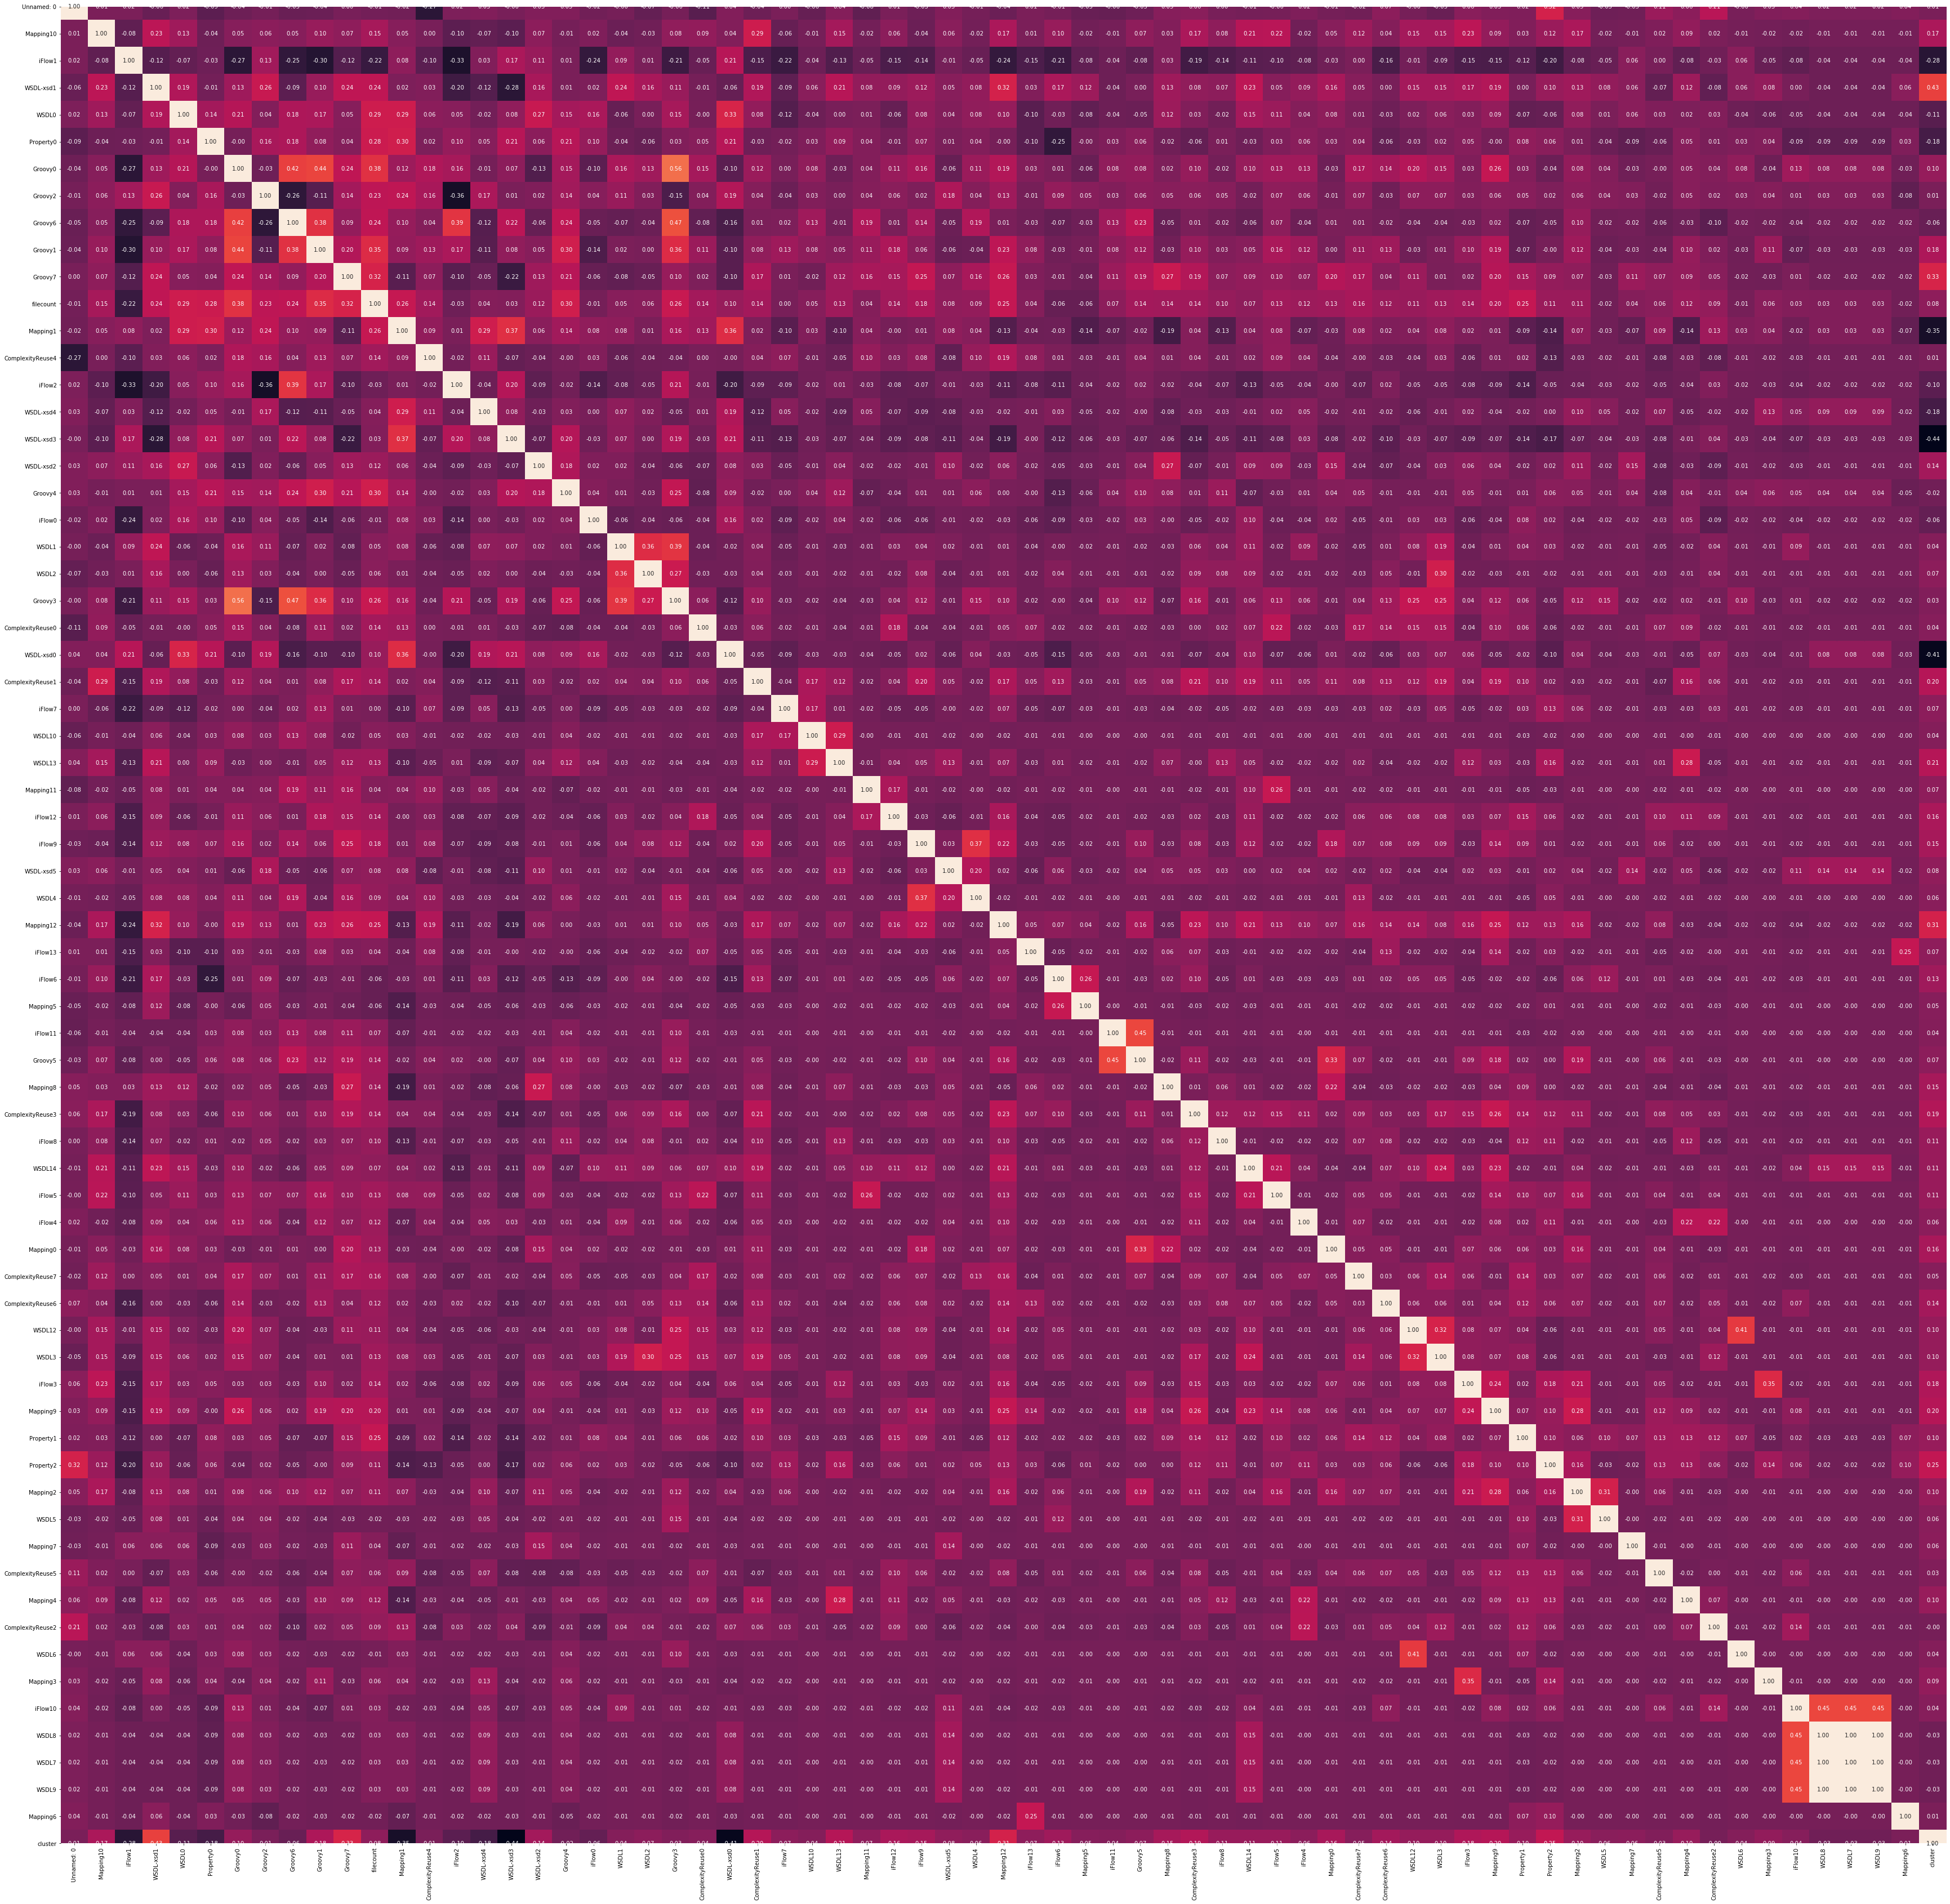

In [16]:
sns_plot = plt.figure(figsize=(60,60))
sns.heatmap(bincorr, annot = True, fmt = ".2f", cbar = False)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns_plot.savefig("binarycorrolationplot.png")

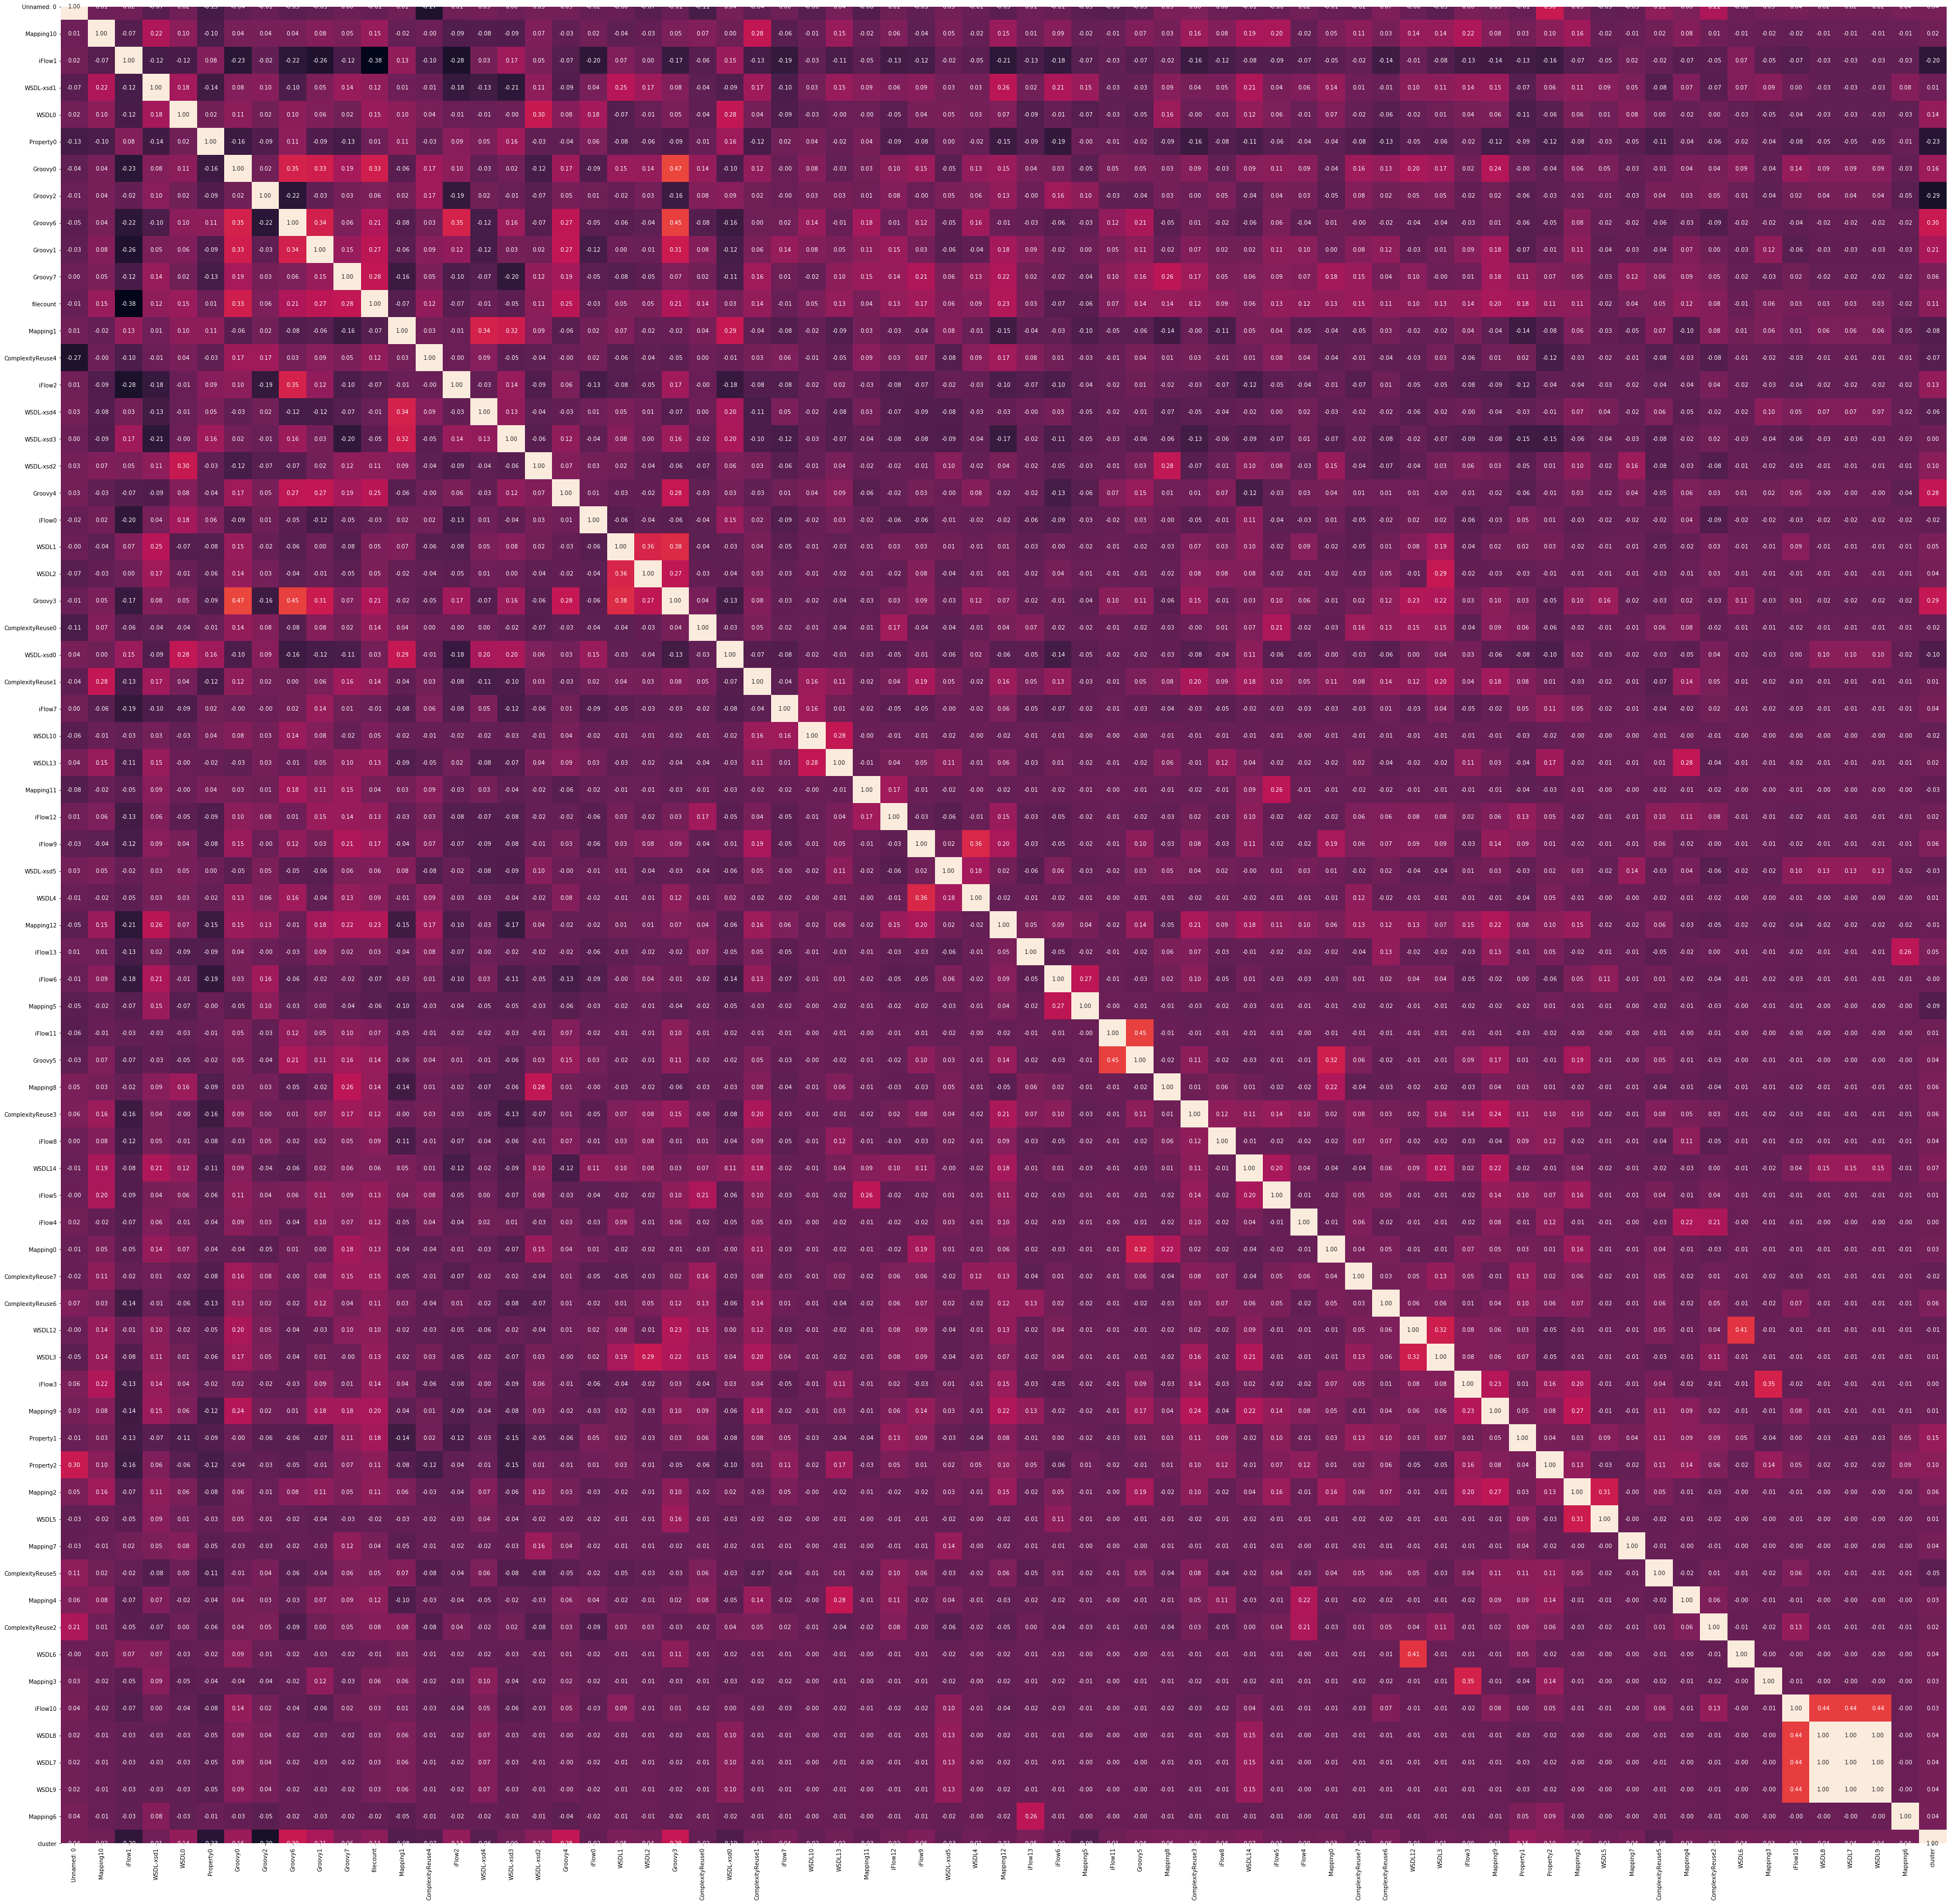

In [17]:
sns_plot = plt.figure(figsize=(60,60))
sns.heatmap(ratiocorr, annot = True, fmt = ".2f", cbar = False)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns_plot.savefig("ratiocorrolationplot.png")

In [18]:
def featureimportance(X_train,y_train,df_data, top=25):
    radm = RandomForestClassifier()
    radm.fit(X_train, y_train)
    indices = np.argsort(radm.feature_importances_)[::-1] 
    df_features = df_data.drop(["Unnamed: 0", 'cluster', 'scenario'], axis=1)

    # Print the feature ranking
    print('Feature ranking:')
    counter = 0
    for f in range(df_features.shape[1]): # returns the number of columns excluding the target variable
        print('%d. %s (%f)' % (f+1 , 
                                df_features.columns[indices[f]], 
                                radm.feature_importances_[indices[f]])) 
        counter+=1
#         if counter >= top:
#             break

In [19]:
def featureimportancerunner(data):
    X,y = createXy(data)
    X_train, X_test, y_train, y_test = create_scaled_train_test(X,y)
    featureimportance(X_train, y_train,data)

featureimportancerunner(binarydf)

Feature ranking:
1. WSDL0 (0.106915)
2. filecount (0.102494)
3. Mapping1 (0.089801)
4. WSDL-xsd0 (0.067646)
5. WSDL-xsd1 (0.057811)
6. WSDL-xsd3 (0.053565)
7. Groovy0 (0.041457)
8. Groovy1 (0.033400)
9. Groovy2 (0.033143)
10. iFlow1 (0.032831)
11. Groovy3 (0.031839)
12. Property0 (0.024325)
13. WSDL-xsd4 (0.021255)
14. Groovy6 (0.021244)
15. Property1 (0.019727)
16. Mapping12 (0.018403)
17. Groovy7 (0.016983)
18. Property2 (0.016193)
19. WSDL-xsd2 (0.015754)
20. Groovy4 (0.015701)
21. iFlow2 (0.015255)
22. WSDL14 (0.014384)
23. iFlow0 (0.012058)
24. WSDL-xsd5 (0.011892)
25. iFlow6 (0.009680)
26. ComplexityReuse1 (0.008377)
27. ComplexityReuse3 (0.008300)
28. ComplexityReuse4 (0.007464)
29. ComplexityReuse2 (0.006205)
30. iFlow12 (0.005963)
31. iFlow7 (0.005727)
32. ComplexityReuse6 (0.005712)
33. ComplexityReuse5 (0.005709)
34. Mapping10 (0.005092)
35. Mapping8 (0.004631)
36. ComplexityReuse7 (0.004623)
37. WSDL13 (0.004465)
38. iFlow13 (0.004159)
39. iFlow3 (0.003973)
40. Mapping9 (0.

In [277]:
featureimportancerunner(ratiodf)

Feature ranking:
1. Property0 (0.166270)
2. Groovy4 (0.105831)
3. Groovy2 (0.098738)
4. Property2 (0.081111)
5. Property1 (0.078309)
6. filecount (0.046280)
7. iFlow1 (0.042823)
8. Mapping1 (0.040241)
9. WSDL-xsd1 (0.037746)
10. Groovy1 (0.030065)
11. WSDL0 (0.025685)
12. WSDL-xsd0 (0.022370)
13. WSDL-xsd3 (0.017843)
14. Groovy6 (0.017670)
15. Groovy3 (0.016592)
16. WSDL-xsd4 (0.016393)
17. iFlow2 (0.014253)
18. Groovy0 (0.014106)
19. Mapping12 (0.009236)
20. iFlow6 (0.009176)
21. Groovy7 (0.008641)
22. WSDL14 (0.007400)
23. iFlow7 (0.006782)
24. ComplexityReuse4 (0.006599)
25. iFlow0 (0.006555)
26. WSDL-xsd2 (0.006515)
27. WSDL-xsd5 (0.005328)
28. ComplexityReuse3 (0.004962)
29. ComplexityReuse7 (0.004601)
30. ComplexityReuse5 (0.004215)
31. ComplexityReuse1 (0.004157)
32. ComplexityReuse2 (0.004013)
33. iFlow8 (0.003853)
34. ComplexityReuse0 (0.003440)
35. Mapping10 (0.003117)
36. ComplexityReuse6 (0.002779)
37. Mapping9 (0.002717)
38. WSDL13 (0.002672)
39. WSDL1 (0.002583)
40. iFlow

In [43]:
lookupdict_scenario_scenarioid = {}
import json
with open('scenario_to_scenarioid.json', 'r') as fp:
    lookupdict_scenario_scenarioid = json.loads(fp.read())
    
scenario_to_scenarioid = lambda x: lookupdict_scenario_scenarioid.get(x)

In [45]:
# def window_function(x_vec, unit_len=1):
#     """
#     Implementation of the window function. Returns 1 if 3x1-sample vector
#     lies within a origin-centered hypercube, 0 otherwise.

#     """
#     for row in x_vec:
#         if np.abs(row) > (unit_len/2):
#             return 0
#     return 1

def parzen_window_est(x_samples, h=1, center=[0,0,0]):
    '''
    source: https://sebastianraschka.com/Articles/2014_kernel_density_est.html
    Implementation of the Parzen-window estimation for hypercubes.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row.
        h: The length of the hypercube.
        center: The coordinate center of the hypercube

    Returns the probability density for observing k samples inside the hypercube.

    '''
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions),  
            'Number of center coordinates have to match sample dimensions'
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)

print('p(x) =', parzen_window_est(X_all, h=1))

SyntaxError: invalid syntax (<ipython-input-45-64035a7563e3>, line 28)

# old code

In [64]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [65]:
# Create Learners per layer
layer_one_estimators = [
                        ('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini',random_state=42)),
                        ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy',random_state=42)),
                        ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
                        ('LogisticRegression', LogisticRegression(n_jobs=-1)),
                        ('BernoulliNB', BernoulliNB()), 
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier(random_state=42)),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression(n_jobs=-1))

# Create Final model by 
clf2 = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)


In [66]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini',random_state=42)),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy',random_state=42)),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
               ('LogisticRegression', LogisticRegression(n_jobs=-1,random_state=42)),
               ('BernoulliNB', BernoulliNB()), 
              ]

In [67]:
classifiers3 = classifiers.copy()
clf3 = StackingClassifier(
    estimators=classifiers3, final_estimator=LogisticRegression(n_jobs=-1,random_state=42)
)

In [68]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini',random_state=42)),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy',random_state=42)),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
              ]

In [69]:
classifiers4 = classifiers.copy()
clf4 = StackingClassifier(
    estimators=classifiers4, final_estimator=RandomForestClassifier(n_jobs=-1, criterion='gini',random_state=42)
)

In [70]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini',random_state=42)),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy',random_state=42)),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
              ]

In [71]:
classifiers5 = classifiers.copy()
clf5 = StackingClassifier(
    estimators=classifiers5, final_estimator=LogisticRegression(n_jobs=-1,random_state=42)
)